This file is not complete. A lot of cells were removed to make this look slightly presentable. However, I have included everything important as per the report, including the code for my best XGBoost submission. My overall best submission was an ensemble with average of predictions of my best models which I used MS Excel for.

In [93]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier as rf
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score,roc_auc_score,make_scorer,roc_curve, auc
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [2]:
train=pd.read_csv('train_final.csv')
test=pd.read_csv('test_final.csv')

### Data Exploration

In [8]:
test.head()

,Id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24
0,16384,37733,1,1.77,118603,1,0,118602,118097,1,...,13881,117941,117887,1,117885,1,1,1,1,1
1,16385,312129,1,3.54,118052,1,0,117961,290919,1,...,14638,118992,290919,1,118321,1,1,1,7,1
2,16386,24884,1,23.01,118300,1,0,117961,302830,1,...,770,119181,4673,1,128230,1,1,1,14,1
3,16387,4674,1,1.77,119091,1,0,119062,118036,1,...,16752,143531,290919,1,117905,1,1,1,81,1
4,16388,68725,1,3.54,118300,1,0,117961,171056,1,...,4945,118360,118638,1,118636,1,1,1,1,1


In [3]:
x_test=test.iloc[:,1:]

In [4]:
X=train.iloc[:,2:]
y=train.iloc[:,1]

In [18]:
x_test.shape

(16385, 24)

In [11]:
y.describe()

count    16383.000000
mean         0.942135
std          0.233495
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: Y, dtype: float64

In [15]:
x_test.nunique()

f1      5141
f2         8
f3       169
f4       170
f5         9
f6         9
f7       125
f8      1909
f9         9
f10      199
f11        7
f12      179
f13      313
f14    11423
f15     3586
f16      422
f17       65
f18        8
f19      313
f20        7
f21        8
f22        5
f23      866
f24        7
dtype: int64

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [47]:
y_test.shape

(4915,)

### Logistic Regression

In [30]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
y_pred=logreg.predict(X_test)

In [35]:
y1_pred=logreg.predict(x_test)

In [37]:
roc_auc_score(y_test.to_numpy(), y_pred)

0.5

In [ ]:
np.savetxt("logreg1.csv", y1_pred, delimiter=",")

### Random Forest

In [49]:
model = rf(n_estimators = 7000,max_depth=10)

In [50]:
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=7000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [51]:
y_pred=model.predict_proba(X_test)

In [53]:
roc_auc_score(y_test, y_pred[:,1])

0.8443355195437166

In [54]:
y1_pred=model.predict_proba(x_test)[:,1]
y1_pred.mean()

0.9424387204789236

### XGBoost

In [537]:
model = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
      colsample_bynode=1, colsample_bytree=0.3, gamma=0.0,
      learning_rate=0.0491, max_delta_step=0, max_depth=11,
      min_child_weight=1.5, missing=None, n_estimators=255,n_jobs=1,
      nthread=None, objective='binary:logistic', random_state=0,
      reg_alpha=0.0011, reg_lambda=1, scale_pos_weight=1, seed=None,
      silent=None, subsample=1, verbosity=1)

model.fit(Xt_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.0,
              learning_rate=0.0491, max_delta_step=0, max_depth=11,
              min_child_weight=1.5, missing=None, n_estimators=255, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0.0011, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [538]:
y1_pred=model.predict_proba(Xt_test)[:,1]
roc_auc_score(y_test.to_numpy(), y1_pred)

0.8982290558704598

In [448]:
y1_pred=model.predict_proba(xt_test)[:,1]
y1_pred.sum()

15573.572

### XGB with DMatrix and Feature Selection

In [68]:
dtrain = xgb.DMatrix(data=X_train,label=y_train)
# dtrain = xgb.DMatrix(data=X,label=y)

In [69]:
dvalid = xgb.DMatrix(X_test,label=y_test)

In [91]:
params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.0018,
                'max_depth': 16,'min_child_weight':1.5,'alpha':0.0009}
model = xgb.train(params, dtrain, 220000)

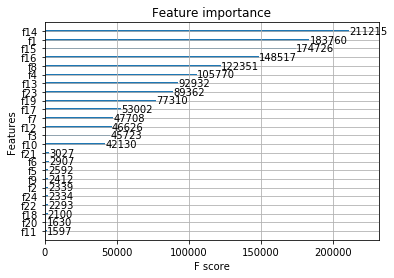

In [28]:
xgb.plot_importance(model)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [651]:
# Xt_train=X_train.loc[:,('f14','f15','f1','f16','f8','f4','f13','f23','f19','f17','f7','f12','f10','f3')]
# Xt_test=X_test.loc[:,('f14','f15','f1','f16','f8','f4','f13','f23','f19','f17','f7','f12','f10','f3')]
# xt_test=x_test.loc[:,('f14','f15','f1','f16','f8','f4','f13','f23','f19','f17','f7','f12','f10','f3')]

In [652]:
#Xt=X.loc[:,('f14','f15','f1','f16','f8','f4','f13','f23','f19','f17','f7','f12','f10','f3')]

In [ ]:
Xt_train=X_train.loc[:,('f14','f15','f1','f16','f8','f4')]
Xt_test=X_test.loc[:,('f14','f15','f1','f16','f8','f4')]
xt_test=x_test.loc[:,('f14','f15','f1','f16','f8','f4')]

In [ ]:
Xt=X.loc[:,('f14','f15','f1','f16','f8','f4')]

In [103]:
Xt_train=X_train.loc[:,('f14','f15','f1','f16','f8','f4','f13','f23','f19')]
Xt_test=X_test.loc[:,('f14','f15','f1','f16','f8','f4','f13','f23','f19')]
xt_test=x_test.loc[:,('f14','f15','f1','f16','f8','f4','f13','f23','f19')]

In [104]:
Xt=X.loc[:,('f14','f15','f1','f16','f8','f4','f13','f23','f19')]

### XGB with DMatrix on new features

In [106]:
dtrain = xgb.DMatrix(data=Xt_train,label=y_train)
# dtrain = xgb.DMatrix(data=Xt,label=y)

In [107]:
dvalid = xgb.DMatrix(Xt_test,label=y_test)

In [142]:
params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.085,
                'max_depth': 16,'min_child_weight':1.5,'alpha':0.001}
model = xgb.train(params, dtrain, 120)


In [143]:
y1_pred=model.predict(dvalid)
roc_auc_score(y_test.to_numpy(), y1_pred)

0.9029434090999714

In [73]:
y1_pred=model.predict(xgb.DMatrix(xt_test))
y1_pred.sum()

15706.512

In [74]:
y1_pred.mean()

0.95859087

In [ ]:
X.shape

In [212]:
np.savetxt("dtrainbest1859.csv", y1_pred, delimiter=",")

### GridSearchCV

In [96]:
tuned_parameters = [{'learning_rate': [0.04, 0.045, 0.05, 0.055, 0.06, 0.065, 0.07, 0.075, 0.08, 0.085, 0.09, 0.095, 0.1], 
                     'alpha': [0.0009, 0.001, 0.0011],
                     'num_boost_round': [100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250],
                      'max_depth': [9,10,11,12,13,14,15,16]  }]

In [ ]:
clf = GridSearchCV(xgb.XGBClassifier(), tuned_parameters, cv=10,
                       scoring='roc_auc')
clf.fit(Xt_train, y_train)

Manual Implementation of Grid Search to incorporate DMatrix (takes a while):

In [109]:
learningrate =[0.04, 0.045, 0.05, 0.055, 0.06, 0.065, 0.07, 0.075, 0.08, 0.085, 0.09, 0.095, 0.1]
maxdepth = [9,10,11,12,13,14,15,16]
nestimators = [100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250]
al=[0.0009, 0.001, 0.0011]

for i in learningrate:
    for j in maxdepth:
        for k in nestimators:
            for l in al:
                
                params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate':i,
                    'max_depth':j,'min_child_weight':1.5,'alpha':l}
                model = xgb.train(params, dtrain, k)
                
                y1_pred=model.predict(dvalid)
                
                print(i," ",j," ",k," ",l," ",roc_auc_score(y_test.to_numpy(), y1_pred))

0.04   9   100   0.0009   0.8794214640471525
0.04   9   100   0.001   0.8794233100928487
0.04   9   100   0.0011   0.8795975768065771
0.04   9   110   0.0009   0.8813369210616093
0.04   9   110   0.001   0.8813376594798877
0.04   9   110   0.0011   0.8811050577221569
0.04   9   120   0.0009   0.8823326781101809
0.04   9   120   0.001   0.8823341549467378
0.04   9   120   0.0011   0.8818995957898343
0.04   9   130   0.0009   0.8834967945262528
0.04   9   130   0.001   0.8834960561079744
0.04   9   130   0.0011   0.8827546841563498
0.04   9   140   0.0009   0.8857659538961163
0.04   9   140   0.001   0.8857670615235342
0.04   9   140   0.0011   0.8846989394836684
0.04   9   150   0.0009   0.8886845521419299
0.04   9   150   0.001   0.8886845521419298
0.04   9   150   0.0011   0.8872930028960764
0.04   9   160   0.0009   0.8881418147072244
0.04   9   160   0.001   0.88814402996206
0.04   9   160   0.0011   0.8867727872188657
0.04   9   170   0.0009   0.8896179128459675
0.04   9   170   0.

0.04   12   220   0.001   0.8987030421356238
0.04   12   220   0.0011   0.8987037805539023
0.04   12   230   0.0009   0.8986177548244558
0.04   12   230   0.001   0.8983995522231559
0.04   12   230   0.0011   0.8983995522231558
0.04   12   240   0.0009   0.8986613215028878
0.04   12   240   0.001   0.898636953699697
0.04   12   240   0.0011   0.8986380613271149
0.04   12   250   0.0009   0.8984298273725748
0.04   12   250   0.001   0.8991172947898683
0.04   12   250   0.0011   0.8991531080763762
0.04   13   100   0.0009   0.8890711141107304
0.04   13   100   0.001   0.8890703756924517
0.04   13   100   0.0011   0.8893494978017289
0.04   13   110   0.0009   0.8930966013560313
0.04   13   110   0.001   0.8930903248006639
0.04   13   110   0.0011   0.8928754450816174
0.04   13   120   0.0009   0.8942178895119499
0.04   13   120   0.001   0.894209397701747
0.04   13   120   0.0011   0.8934462424109063
0.04   13   130   0.0009   0.8941813378071636
0.04   13   130   0.001   0.894185029898556

0.04   16   180   0.001   0.8992782699745838
0.04   16   180   0.0011   0.900415064914351
0.04   16   190   0.0009   0.8998719582705063
0.04   16   190   0.001   0.8998527593952651
0.04   16   190   0.0011   0.9009179277620165
0.04   16   200   0.0009   0.9001049292373764
0.04   16   200   0.001   0.9003999273396414
0.04   16   200   0.0011   0.9011523755654437
0.04   16   210   0.0009   0.9003043021725743
0.04   16   210   0.001   0.9010035842823239
0.04   16   210   0.0011   0.9013816544409214
0.04   16   220   0.0009   0.899579544632216
0.04   16   220   0.001   0.9001340967593775
0.04   16   220   0.0011   0.9011608673756466
0.04   16   230   0.0009   0.8999085099752926
0.04   16   230   0.001   0.9006103765490169
0.04   16   230   0.0011   0.9014868790456092
0.04   16   240   0.0009   0.9000979142637306
0.04   16   240   0.001   0.9004453400637698
0.04   16   240   0.0011   0.9018007068139763
0.04   16   250   0.0009   0.9001643719087964
0.04   16   250   0.001   0.900591546882914

0.045   12   130   0.0011   0.8941100804432873
0.045   12   140   0.0009   0.8954846460687349
0.045   12   140   0.001   0.8960569202345807
0.045   12   140   0.0011   0.8953129638189813
0.045   12   150   0.0009   0.896927884594084
0.045   12   150   0.001   0.8974628686368652
0.045   12   150   0.0011   0.8967358958416713
0.045   12   160   0.0009   0.8969862196380864
0.045   12   160   0.001   0.897611659919985
0.045   12   160   0.0011   0.8973620745418484
0.045   12   170   0.0009   0.8974277937686357
0.045   12   170   0.001   0.8979291797797446
0.045   12   170   0.0011   0.897328476510176
0.045   12   180   0.0009   0.8981001236112198
0.045   12   180   0.001   0.8989814258266223
0.045   12   180   0.0011   0.8979217955969595
0.045   12   190   0.0009   0.8986280926803549
0.045   12   190   0.001   0.8994137697286904
0.045   12   190   0.0011   0.8980465882860277
0.045   12   200   0.0009   0.8988736167579596
0.045   12   200   0.001   0.8993203598164587
0.045   12   200   0.00

0.045   15   240   0.0011   0.9002803035785226
0.045   15   250   0.0009   0.9008311636142916
0.045   15   250   0.001   0.9006783110306399
0.045   15   250   0.0011   0.90067831103064
0.045   16   100   0.0009   0.8902463068009798
0.045   16   100   0.001   0.8902470452192586
0.045   16   100   0.0011   0.890249260474094
0.045   16   110   0.0009   0.8926974862764963
0.045   16   110   0.001   0.8926406280690509
0.045   16   110   0.0011   0.8926413664873294
0.045   16   120   0.0009   0.8945512853646973
0.045   16   120   0.001   0.8944482760148451
0.045   16   120   0.0011   0.8944493836422628
0.045   16   130   0.0009   0.8949692301103345
0.045   16   130   0.001   0.8948019783702518
0.045   16   130   0.0011   0.8948023475793909
0.045   16   140   0.0009   0.894819700408936
0.045   16   140   0.001   0.8952645974217387
0.045   16   140   0.0011   0.8952657050491566
0.045   16   150   0.0009   0.8959483727476396
0.045   16   150   0.001   0.8969182851564634
0.045   16   150   0.001

0.05   11   200   0.0011   0.8951649109541396
0.05   11   210   0.0009   0.8950013513054497
0.05   11   210   0.001   0.8950017205145888
0.05   11   210   0.0011   0.8949784603388158
0.05   11   220   0.0009   0.8948780354529384
0.05   11   220   0.001   0.894878773871217
0.05   11   220   0.0011   0.8950382722193752
0.05   11   230   0.0009   0.8941547547491372
0.05   11   230   0.001   0.8941543855399978
0.05   11   230   0.0011   0.894086451058375
0.05   11   240   0.0009   0.8933487711981427
0.05   11   240   0.001   0.8933480327798643
0.05   11   240   0.0011   0.8937021043444101
0.05   11   250   0.0009   0.8934842709522495
0.05   11   250   0.001   0.8934861169979457
0.05   11   250   0.0011   0.8933247726040912
0.05   12   100   0.0009   0.8897814724946576
0.05   12   100   0.001   0.8909278668720455
0.05   12   100   0.0011   0.8909592496488821
0.05   12   110   0.0009   0.8915939201592622
0.05   12   110   0.001   0.8922584966099217
0.05   12   110   0.0011   0.89232458504584

KeyboardInterrupt: 